# Curse of dimensionality

## Sparsity

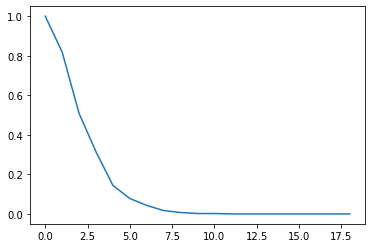

In [64]:
N = 1000
dim = 2
l = []
for dim in range(1,20):
    p1 = np.random.uniform(-1,1,(N,dim))
    zero = np.zeros(dim)
    score = sum(np.array(list(map(lambda x : euclidean(zero,x),p1))) < 1)/N
    l.append(score)
plt.plot(l)

## Concentration des distances

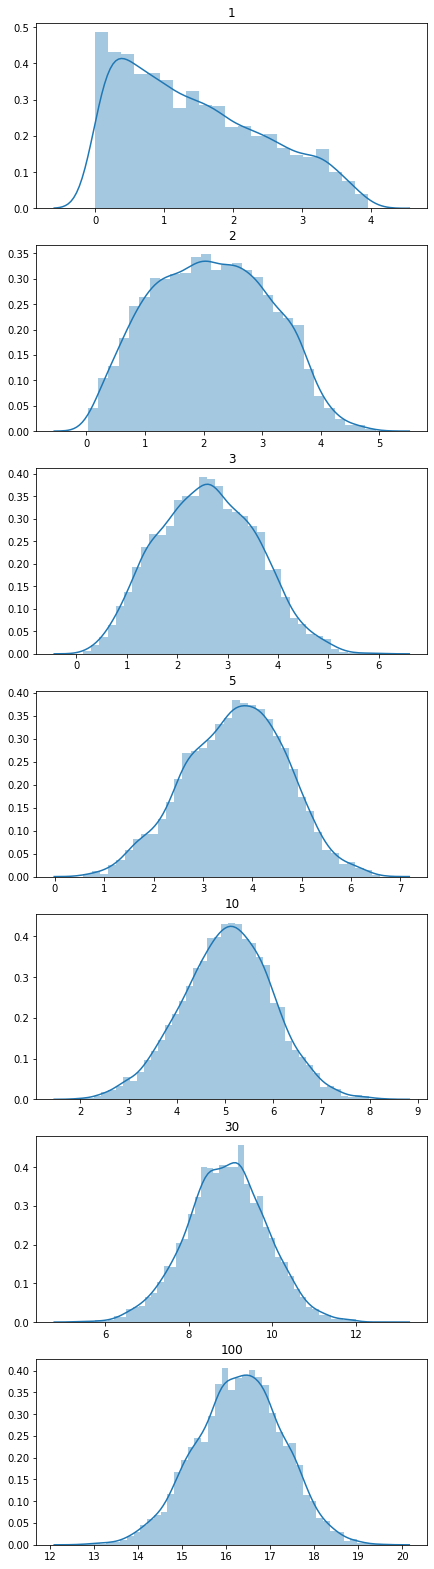

In [50]:
# Test
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist,euclidean

ks = [1,2,3,5,10,30,100]
fig, axes = plt.subplots(len(ks),figsize = (7,4*len(ks)))
for i,k in enumerate(ks):
    p1 = np.random.uniform(0,4,(100,k))
    sns.distplot(pdist(p1,'euclidean'),ax= axes[i])
    axes[i].set_title(k)

## Hubness

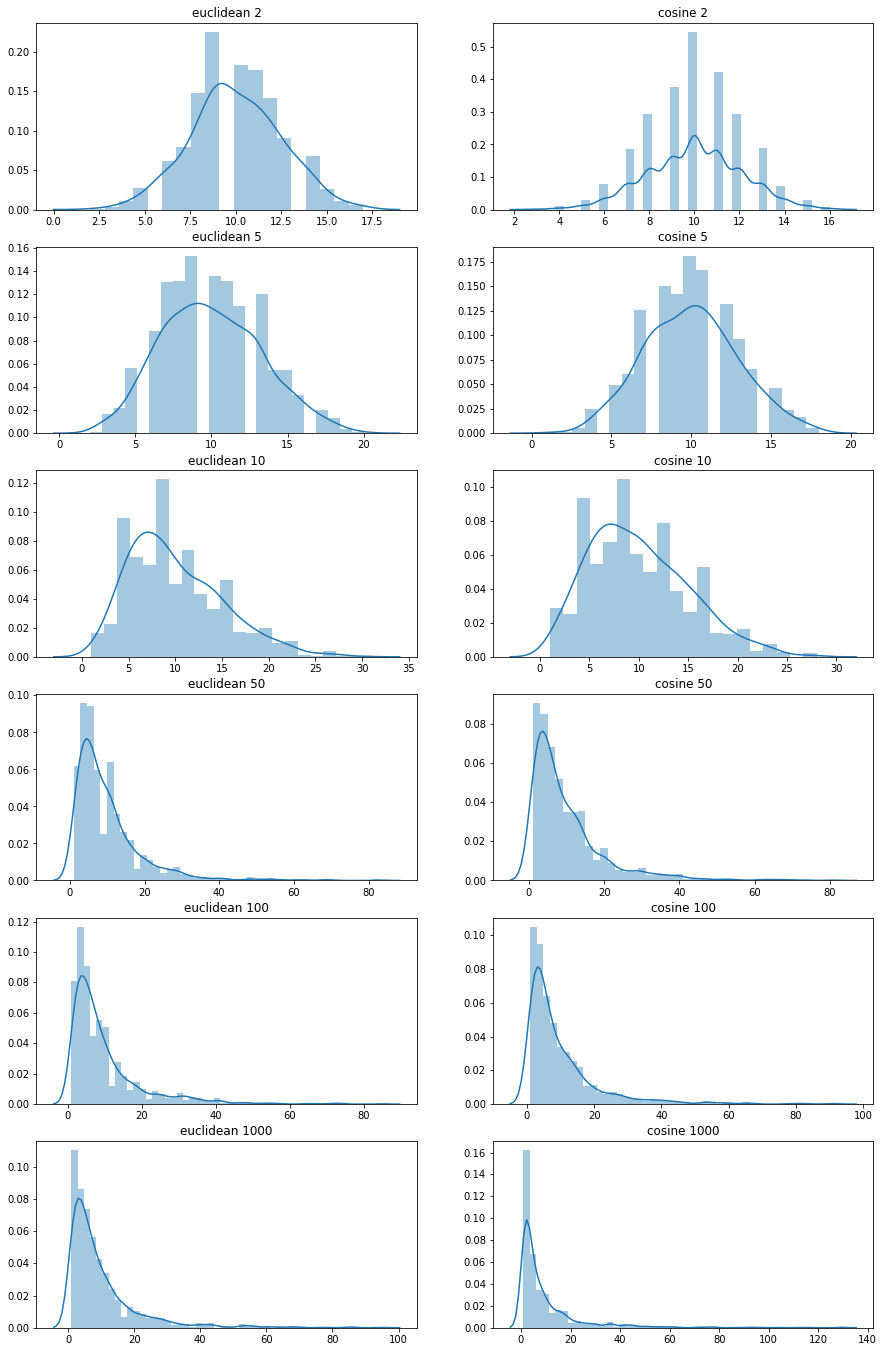

In [42]:
from scipy.spatial.distance import pdist, squareform
k = 10
N = 1000
def to_hub_tab(line):
    args = np.argsort(line)[:k]
    ls = np.zeros_like(line)
    ls[args] = 1
    return ls

dimensions = [2,5,10,50,100,1000]
fig, axes = plt.subplots(len(dimensions),2,figsize = (15,4*len(dimensions)))

for i,dim in enumerate(dimensions):
    p1 = np.random.uniform(0,4,(N,dim))
    
    # Euclidean
    matrix = squareform(pdist(p1,'euclidean'))
    k_neihbors = np.apply_along_axis(to_hub_tab,0,matrix)
    hubness = k_neihbors.sum(axis=1)
    sns.distplot(hubness, hist=True,ax = axes[i,0])
#     axes[i,0].hist(hubness)
    axes[i,0].set_title('euclidean {}'.format(dim))
    
    # Cosine
    matrix = squareform(pdist(p1,'cosine'))
    k_neihbors = np.apply_along_axis(to_hub_tab,0,matrix)
    hubness = k_neihbors.sum(axis=1)
    sns.distplot(hubness, hist=True,ax = axes[i,1])
#     axes[i,1].hist(hubness)
    axes[i,1].set_title('cosine {}'.format(dim))